In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
schools = pd.read_csv('Schools_clear.csv', index_col=0)

In [59]:
schools.head(n = 2)

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,...,Strong Family-Community Ties Rating_Meeting Target,Strong Family-Community Ties Rating_Not Meeting Target,Trust Rating_Approaching Target,Trust Rating_Exceeding Target,Trust Rating_Meeting Target,Trust Rating_Not Meeting Target,Student Achievement Rating_Approaching Target,Student Achievement Rating_Exceeding Target,Student Achievement Rating_Meeting Target,Student Achievement Rating_Not Meeting Target
0,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,1,0,0,1,0,0,1,0,0,0
1,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,10003,"PK,0K,01,02,03,04,05",...,1,0,0,0,1,0,0,1,0,0


In [53]:
names = schools['School Name']
names
prom = dict()

for item in names:
    if item in prom:
        prom[item] += 1
    else:
        prom[item] = 1
prom

{'P.S. 015 ROBERTO CLEMENTE': 1,
 'P.S. 019 ASHER LEVY': 1,
 'P.S. 020 ANNA SILVER': 1,
 'P.S. 034 FRANKLIN D. ROOSEVELT': 1,
 'THE STAR ACADEMY - P.S.63': 1,
 'P.S. 064 ROBERT SIMON': 1,
 'P.S. 110 FLORENCE NIGHTINGALE': 1,
 'P.S. 134 HENRIETTA SZOLD': 1,
 'P.S. 140 NATHAN STRAUS': 1,
 'P.S. 142 AMALIA CASTRO': 1,
 'P.S. 184M SHUANG WEN': 1,
 'P.S. 188 THE ISLAND SCHOOL': 1,
 'ORCHARD COLLEGIATE ACADEMY': 1,
 'TECHNOLOGY, ARTS, AND SCIENCES STUDIO': 1,
 'THE EAST VILLAGE COMMUNITY SCHOOL': 1,
 'UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL': 1,
 "THE CHILDREN'S WORKSHOP SCHOOL": 1,
 'NEIGHBORHOOD SCHOOL': 1,
 'EARTH SCHOOL': 1,
 'SCHOOL FOR GLOBAL LEADERS': 1,
 'EAST SIDE COMMUNITY SCHOOL': 1,
 'NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL': 1,
 'TOMPKINS SQUARE MIDDLE SCHOOL': 1,
 'P.S. 001 ALFRED E. SMITH': 1,
 'P.S. 002 MEYER LONDON': 1,
 'P.S. 003 CHARRETTE SCHOOL': 1,
 'P.S. 006 LILLIE D. BLAKE': 1,
 'P.S. 011 WILLIAM T. HARRIS': 1,
 'P.S. 033 CHELSEA PREP': 1,
 'P.S. 0

Каждое наблюдение – это отдельная школа.

In [60]:
schools_dum = pd.get_dummies(schools)

In [61]:
schools_dum.head(2)

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,...,Percent White_80%,Percent White_81%,Percent White_82%,Percent White_83%,Percent White_85%,Percent White_87%,Percent White_88%,Percent White_9%,Percent White_91%,Percent White_92%
0,310100010015,1,40.721834,-73.978766,10009,0.919,31141.72,0.94,0.18,0.89,...,0,0,0,0,0,0,0,0,0,0
1,310100010019,1,40.729892,-73.984231,10003,0.641,56462.88,0.92,0.30,0.96,...,0,0,0,0,0,0,0,0,0,0


In [62]:
len(list(schools_dum.columns))

4314

In [63]:
schools_dum.to_csv("Schools_clear.csv")

----------------------

Продолжим работать с очищенным файлом.

In [64]:
schools = schools_dum

In [65]:
schools = pd.read_csv('Schools_clear.csv', index_col=0)

In [66]:
schools.head(2)

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,...,Percent White_80%,Percent White_81%,Percent White_82%,Percent White_83%,Percent White_85%,Percent White_87%,Percent White_88%,Percent White_9%,Percent White_91%,Percent White_92%
0,310100010015,1,40.721834,-73.978766,10009,0.919,31141.72,0.94,0.18,0.89,...,0,0,0,0,0,0,0,0,0,0
1,310100010019,1,40.729892,-73.984231,10003,0.641,56462.88,0.92,0.30,0.96,...,0,0,0,0,0,0,0,0,0,0


In [103]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [104]:
X_sne = tsne.fit_transform(schools)

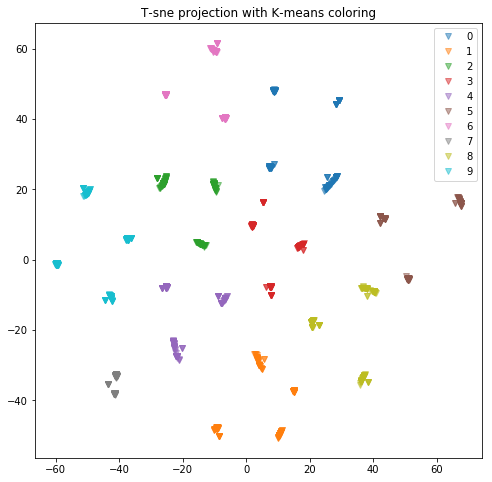

In [111]:
km = KMeans(n_clusters = 10)
km.fit(X_sne)
y = km.predict(X_sne)

plt.figure(figsize=(8, 8))

for i in range(10):
    bit_mask = y == i
    plt.plot(X_sne[bit_mask, 0], X_sne[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with K-means coloring')
plt.show()

In [101]:
len(X_sne[:, 0])

1272